# Xception Transfer Learning with CUB-200-2011 Dataset

In [1]:
import tensorflow as tf

In [2]:
%load_ext tensorboard

## Run ID

In [3]:
import datetime as dt

# run_id = dt.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_log_dir = './tb_log_2'

## Parameters

In [4]:
label_smoothing = 0.1

In [5]:
# Parameter space setup
optimizers = [
    tf.optimizers.Adam(
        # learning_rate=0.001, # this is the default
    ),
    tf.optimizers.Adam(
        learning_rate=0.0001,
    ),
]

losses = {
    'Categorical Cross Entropy': tf.keras.losses.CategoricalCrossentropy(
        label_smoothing = label_smoothing,
    ),
    'Binary Cross Entropy': tf.keras.losses.BinaryCrossentropy(
        from_logits = True,
    ),
}

In [6]:
# Selected model parameters

batch_size = 64
dropout = 0.1
optimizer = optimizers[1]
loss = losses['Categorical Cross Entropy']


In [7]:
epochs = 80

## Load Dataset

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/mnt/cub/CUB_200_2011/images'

datagen = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.xception.preprocess_input,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    channel_shift_range=10.,
    horizontal_flip=True,
)


In [9]:
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(299,299),
    batch_size=batch_size,
    subset='training',
    shuffle=True,
)

validation_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(299,299),
    batch_size=batch_size,
    subset='validation',
    shuffle=True,
)


Found 9465 images belonging to 200 classes.
Found 2323 images belonging to 200 classes.


In [10]:
type(train_gen)

keras.preprocessing.image.DirectoryIterator

## Build Model

In [11]:
from tensorflow.keras import layers

# https://www.tensorflow.org/tutorials/images/data_augmentation
# This is the recommended way of doing image data augmentation
# (as opposed to using parameters in the ImageDataGenerator)
model = tf.keras.models.Sequential([
    # layers.RandomHeight(0.2),
    # layers.RandomWidth(0.2),
    # layers.RandomFlip("horizontal"),
    # layers.RandomRotation(0.2),
    # layers.RandomZoom(0.2, 0.2),
])


In [12]:

base_model = tf.keras.applications.Xception(
    include_top=False,
    pooling='avg',
    weights="imagenet"
)


In [13]:
base_model.trainable = False
model.add(base_model)


In [14]:

# model.add( GlobalAveragePooling2D() )
model.add( layers.Dense(200) )
model.add( layers.Dropout(dropout) )
model.add( layers.Activation("softmax", dtype="float32") )


In [15]:
%%time
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[
        'accuracy',
        tf.keras.metrics.TopKCategoricalAccuracy(k=3, name="Top3"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=10, name="Top10"),
    ],
)

CPU times: user 7.81 ms, sys: 554 µs, total: 8.36 ms
Wall time: 57.9 ms


## Train

In [16]:
%%time
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=validation_gen,
    callbacks=[
        tf.keras.callbacks.TensorBoard(
            log_dir = tb_log_dir,
            histogram_freq=1,
        )
        #tf.keras.callbacks.EarlyStopping(
        #    monitor='val_accuracy',
        #    patience=5,
        #    min_delta=0.001,
        #    mode='max',
        #),
        #tf.keras.callbacks.ModelCheckpoint(
        ##    filepath='checkpoints3',
        #    save_weights_only=True,
        #),
    ]
)

Epoch 1/80
148/148 [==============================] - 125s 813ms/step - loss: 5.0778 - accuracy: 0.0646 - Top3: 0.1390 - Top10: 0.2883 - val_loss: 4.8153 - val_accuracy: 0.1558 - val_Top3: 0.3384 - val_Top10: 0.6108
Epoch 2/80
148/148 [==============================] - 118s 799ms/step - loss: 4.6449 - accuracy: 0.2328 - Top3: 0.4433 - Top10: 0.6523 - val_loss: 4.4336 - val_accuracy: 0.3216 - val_Top3: 0.5648 - val_Top10: 0.8097
Epoch 3/80
148/148 [==============================] - 117s 790ms/step - loss: 4.3198 - accuracy: 0.3554 - Top3: 0.5774 - Top10: 0.7630 - val_loss: 4.1235 - val_accuracy: 0.4051 - val_Top3: 0.6505 - val_Top10: 0.8678
Epoch 4/80
148/148 [==============================] - 116s 787ms/step - loss: 4.0545 - accuracy: 0.4330 - Top3: 0.6467 - Top10: 0.8113 - val_loss: 3.8835 - val_accuracy: 0.4615 - val_Top3: 0.6875 - val_Top10: 0.8868
Epoch 5/80
148/148 [==============================] - 118s 800ms/step - loss: 3.8296 - accuracy: 0.4736 - Top3: 0.6840 - Top10: 0.8398 -

Epoch 39/80
148/148 [==============================] - 116s 784ms/step - loss: 2.2631 - accuracy: 0.7115 - Top3: 0.8343 - Top10: 0.8985 - val_loss: 2.2721 - val_accuracy: 0.6586 - val_Top3: 0.8377 - val_Top10: 0.9479
Epoch 40/80
148/148 [==============================] - 117s 789ms/step - loss: 2.2547 - accuracy: 0.7092 - Top3: 0.8316 - Top10: 0.8976 - val_loss: 2.2566 - val_accuracy: 0.6569 - val_Top3: 0.8399 - val_Top10: 0.9458
Epoch 41/80
148/148 [==============================] - 117s 791ms/step - loss: 2.2491 - accuracy: 0.7130 - Top3: 0.8347 - Top10: 0.8969 - val_loss: 2.2591 - val_accuracy: 0.6530 - val_Top3: 0.8343 - val_Top10: 0.9462
Epoch 42/80
148/148 [==============================] - 117s 793ms/step - loss: 2.2472 - accuracy: 0.7159 - Top3: 0.8334 - Top10: 0.8945 - val_loss: 2.2562 - val_accuracy: 0.6638 - val_Top3: 0.8377 - val_Top10: 0.9492
Epoch 43/80
148/148 [==============================] - 117s 792ms/step - loss: 2.2228 - accuracy: 0.7195 - Top3: 0.8361 - Top10: 0.8

Epoch 77/80
148/148 [==============================] - 117s 791ms/step - loss: 1.9818 - accuracy: 0.7752 - Top3: 0.8637 - Top10: 0.9211 - val_loss: 2.0778 - val_accuracy: 0.6793 - val_Top3: 0.8627 - val_Top10: 0.9587
Epoch 78/80
148/148 [==============================] - 117s 790ms/step - loss: 1.9919 - accuracy: 0.7714 - Top3: 0.8617 - Top10: 0.9137 - val_loss: 2.0872 - val_accuracy: 0.6827 - val_Top3: 0.8614 - val_Top10: 0.9539
Epoch 79/80
148/148 [==============================] - 116s 784ms/step - loss: 2.0041 - accuracy: 0.7674 - Top3: 0.8567 - Top10: 0.9116 - val_loss: 2.0801 - val_accuracy: 0.6845 - val_Top3: 0.8618 - val_Top10: 0.9522
Epoch 80/80
148/148 [==============================] - 116s 781ms/step - loss: 1.9928 - accuracy: 0.7693 - Top3: 0.8604 - Top10: 0.9142 - val_loss: 2.0711 - val_accuracy: 0.6905 - val_Top3: 0.8627 - val_Top10: 0.9531
CPU times: user 2h 45min 7s, sys: 16min 20s, total: 3h 1min 28s
Wall time: 2h 36min 14s


## Evaluation

In [17]:
%%time
model.evaluate(validation_gen)

37/37 [==============================] - 23s 611ms/step - loss: 2.0865 - accuracy: 0.6793 - Top3: 0.8657 - Top10: 0.9522
CPU times: user 23.2 s, sys: 584 ms, total: 23.8 s
Wall time: 23.4 s


[2.0865015983581543,
 0.6792939901351929,
 0.8656909465789795,
 0.9522169828414917]

In [18]:
import os
model.save(f'model.{os.uname()[1]}.003')

INFO:tensorflow:Assets written to: model.cserv.003/assets


INFO:tensorflow:Assets written to: model.cserv.003/assets


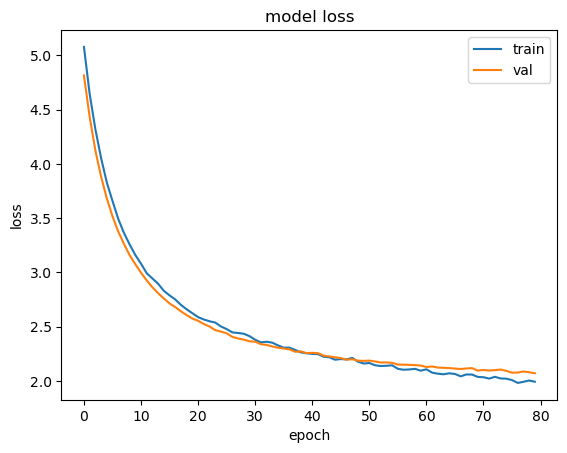

In [19]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense (Dense)               (None, 200)               409800    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
Total params: 21,271,280
Trainable params: 409,800
Non-trainable params: 20,861,480
_________________________________________________________________
